## Environment setup

In [1]:
import glob
import importlib

## Networks definitions and adaptations

In [2]:
from architecture_definitions import *

oneOverPt = False 
lut_nn = True
output_type = 0
last_input_is_bias = True

if output_type == 1:
    layer3_neurons = 3
    loss_fn = custom_loss3
else: 
    output_cnt = 1
    layer3_neurons = 1
    loss_fn = 'mae'
        
if not last_input_is_bias:
    networkInputSize =  nLayers
    layer2_lutRangesCnt = 1
    layer2_input_offset = None 

print_Classic_NN()  
print_LUT_NN()  

2023-11-27 12:47:29.901722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Classic NN definitions:
dense_layer1_size: 128
dense_layer2_size: 64
dense_layer3_size: 32
dense_layer4_size: 1
------------------------
LUT NN definitions:
layer1_lut_size 1024
layer2_lut_size 256
layer3_lut_size 32
layer2_lutRangesCnt 16
layer2_input_offset 8.0
------------------------


### Classic NN data read test

In [3]:
%%time
import io_functions as io
importlib.reload(io)

trainDataDir = "/scratch_cmsse/alibordi/data/training/"
testDataDir = "/scratch_cmsse/alibordi/data/test/"
testFileNames = glob.glob(trainDataDir+'*OneOverPt*tfrecord.gzip')
trainFileNames = glob.glob(testDataDir+'*iPtX*.tfrecord.gzip')

batchSize = 4096
nEpochs = 1

dataset = io.get_Classic_NN_dataset(batchSize, nEpochs, trainFileNames, isTrain=True)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

dataset = io.get_Classic_NN_dataset(batchSize, nEpochs, testFileNames, isTrain=False)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

Reading data from files:
/scratch_cmsse/alibordi/data/test/SingleMu_iPtX_Feb15_Unfiltered.tfrecord.gzip
/scratch_cmsse/alibordi/data/test/SingleMu_iPtX_Feb22_chunk_0_filtered.tfrecord.gzip


2023-11-27 12:47:42.632209: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


Execution time: 21.83919802866876
features.shape: (4096, 37)
len(labels) 1
labels[0].shape: (4096,)
weights.shape: (4096,)
Hits in OMTF Layers:
 [  0.   0.  -4. -14.  -7.  -6.   0.   0.   0.   0.   0.  -2.  -4.  -3.
  -9.   0.   0.   0.   0.  16.   0.   0.   0.   0.  16.  16.  16.  16.
  16.   0.   0.   0.   0.  16.  16.  16.   0.]
ptLabels:
 34.8
weights:
 1.0
Reading data from files:
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_April4_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_Feb15_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_Feb22_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_April14_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_April20_chunk_0_filtered.tfrecord.gzip
Execution time: 22.267563736997545
features.shape: (4096, 37)
len(labels) 6
labels[0].shape: (4096,)
weights.shape: (4096,)
Hits in OMTF

### LUT NN data read test

In [4]:
%%time
import io_functions as io
importlib.reload(io)

trainDataDir = "/scratch_cmsse/alibordi/data/training/"
testDataDir = "/scratch_cmsse/alibordi/data/test/"
testFileNames = glob.glob(trainDataDir+'*OneOverPt*tfrecord.gzip')
trainFileNames = glob.glob(testDataDir+'*iPtX*.tfrecord.gzip')

batchSize = 4096
nEpochs = 1

dataset = io.get_LUT_NN_dataset(batchSize, nEpochs, trainFileNames, 
                                nRefLayers=nRefLayers,
                                layer1_lut_size=layer1_lut_size,
                                layer2_lut_size=layer2_lut_size,
                                layer2_lutRangesCnt=layer2_lutRangesCnt,
                                last_input_is_bias=last_input_is_bias,
                                rangeFactor=rangeFactor,
                                isTrain=True)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

dataset = io.get_LUT_NN_dataset(batchSize, nEpochs, testFileNames, 
                                nRefLayers=nRefLayers,
                                layer1_lut_size=layer1_lut_size,
                                layer2_lut_size=layer2_lut_size,
                                layer2_lutRangesCnt=layer2_lutRangesCnt,
                                last_input_is_bias=last_input_is_bias,
                                rangeFactor=rangeFactor,
                                isTrain=False)
io.reading_benchmark(dataset.take(100))
io.dumpOneEvent(dataset)

Reading data from files:
/scratch_cmsse/alibordi/data/test/SingleMu_iPtX_Feb15_Unfiltered.tfrecord.gzip
/scratch_cmsse/alibordi/data/test/SingleMu_iPtX_Feb22_chunk_0_filtered.tfrecord.gzip
Execution time: 22.014881236478686
features.shape: (4096, 19)
len(labels) 1
labels[0].shape: (4096,)
weights.shape: (4096,)
Hits in OMTF Layers:
 [  64.   1023.     63.     63.12   62.25   63.25 1023.   1023.   1023.
 1023.   1023.     63.5    63.     63.25   61.75 1023.   1023.   1023.
  144.  ]
ptLabels:
 34.8
weights:
 1.0
Reading data from files:
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_April4_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_Feb15_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_Feb22_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_April14_chunk_0_filtered.tfrecord.gzip
/scratch_cmsse/alibordi/data/training/SingleMu_OneOverPt_April20_chunk_0_filter

## Datasets statistics

,muonPt,muonEta,muonCharge
count,5.516129e+06,5.516129e+06,5.516129e+06
mean,2.914697e+01,1.202476e-02,6.586684e-03
std,2.573247e+01,1.038049e+00,9.999784e-01
min,3.095552e+00,-1.240000e+00,-1.000000e+00
25%,8.384981e+00,-1.027960e+00,-1.000000e+00
50%,1.917706e+01,8.346433e-01,1.000000e+00
75%,4.379244e+01,1.032655e+00,1.000000e+00
max,9.999994e+01,1.240000e+00,1.000000e+00


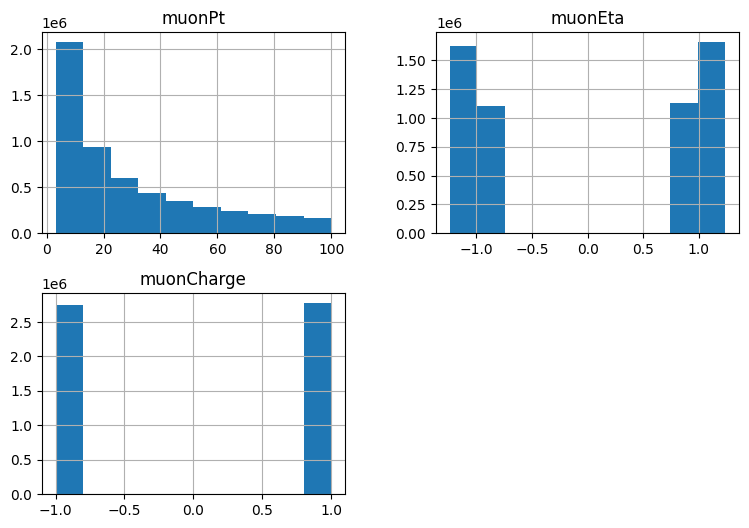

In [5]:
import pandas as pd
import numpy as np
import glob

trainDataDir = "/scratch_cmsse/alibordi/data/training/"
trainFileNames = glob.glob(trainDataDir+'df.parquet*OneOverPt*')
df = pd.read_parquet(trainFileNames)
df[["muonPt", "muonEta", "muonCharge"]].hist(figsize=(9,6))
df[["muonPt", "muonEta", "muonCharge"]].describe()